In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from tqdm import tqdm
from torch.utils.data import DataLoader, TensorDataset
import helper_functions
import importlib
import os

train_dtypes=test_dtypes=dtypes = {
    'ProductName':                                                  'float32',
    'IsBeta':                                                       'float32',
    'RtpStateBitfield':                                             'float32',
    'IsSxsPassiveMode':                                             'float32',
    'DefaultBrowsersIdentifier':                                    'float32',
    'AVProductStatesIdentifier':                                    'float32',
    'AVProductsInstalled':                                          'float32',
    'AVProductsEnabled':                                            'float32',
    'HasTpm':                                                       'float32',
    'CountryIdentifier':                                            'float32',
    'CityIdentifier':                                               'float32',
    'OrganizationIdentifier':                                       'float32',
    'GeoNameIdentifier':                                            'float32',
    'LocaleEnglishNameIdentifier':                                  'float32',
    'Platform':                                                     'float32',
    'Processor':                                                    'float32',
    'OsVer':                                                        'float32',
    'OsBuild':                                                      'float32',
    'OsSuite':                                                      'float32',
    'OsPlatformSubRelease':                                         'float32',
    'OsBuildLab':                                                   'float32',
    'SkuEdition':                                                   'float32',
    'IsProtected':                                                  'float32',
    'AutoSampleOptIn':                                              'float32',
    'PuaMode':                                                      'float32',
    'SMode':                                                        'float32',
    'IeVerIdentifier':                                              'float32',
    'SmartScreen':                                                  'float32',
    'Firewall':                                                     'float32',
    'UacLuaenable':                                                 'float32',
    'Census_MDC2FormFactor':                                        'float32',
    'Census_DeviceFamily':                                          'float32',
    'Census_OEMNameIdentifier':                                     'float32',
    'Census_OEMModelIdentifier':                                    'float32',
    'Census_ProcessorCoreCount':                                    'float32',
    'Census_ProcessorManufacturerIdentifier':                       'float32',
    'Census_ProcessorModelIdentifier':                              'float32',
    'Census_ProcessorClass':                                        'float32',
    'Census_PrimaryDiskTotalCapacity':                              'float32',
    'Census_PrimaryDiskTypeName':                                   'float32',
    'Census_SystemVolumeTotalCapacity':                             'float32',
    'Census_HasOpticalDiskDrive':                                   'float32',
    'Census_TotalPhysicalRAM':                                      'float32',
    'Census_ChassisTypeName':                                       'float32',
    'Census_InternalPrimaryDiagonalDisplaySizeInInches':            'float32',
    'Census_InternalPrimaryDisplayResolutionHorizontal':            'float32',
    'Census_InternalPrimaryDisplayResolutionVertical':              'float32',
    'Census_PowerPlatformRoleName':                                 'float32',
    'Census_InternalBatteryType':                                   'float32',
    'Census_InternalBatteryNumberOfCharges':                        'float32',
    'Census_OSArchitecture':                                        'float32',
    'Census_OSBranch':                                              'float32',
    'Census_OSBuildNumber':                                         'float32',
    'Census_OSBuildRevision':                                       'float32',
    'Census_OSEdition':                                             'float32',
    'Census_OSSkuName':                                             'float32',
    'Census_OSInstallTypeName':                                     'float32',
    'Census_OSInstallLanguageIdentifier':                           'float32',
    'Census_OSUILocaleIdentifier':                                  'float32',
    'Census_OSWUAutoUpdateOptionsName':                             'float32',
    'Census_IsPortableOperatingSystem':                             'float32',
    'Census_GenuineStateName':                                      'float32',
    'Census_ActivationChannel':                                     'float32',
    'Census_IsFlightingInternal':                                   'float32',
    'Census_IsFlightsDisabled':                                     'float32',
    'Census_FlightRing':                                            'float32',
    'Census_ThresholdOptIn':                                        'float32',
    'Census_FirmwareManufacturerIdentifier':                        'float32',
    'Census_FirmwareVersionIdentifier':                             'float32',
    'Census_IsSecureBootEnabled':                                   'float32',
    'Census_IsWIMBootEnabled':                                      'float32',
    'Census_IsVirtualDevice':                                       'float32',
    'Census_IsTouchEnabled':                                        'float32',
    'Census_IsPenCapable':                                          'float32',
    'Census_IsAlwaysOnAlwaysConnectedCapable':                      'float32',
    'Wdft_IsGamer':                                                 'float32',
    'Wdft_RegionIdentifier':                                        'float32',
    'EngineVersion_1':                                              'int8',
    'EngineVersion_2':                                              'int8',
    'EngineVersion_3':                                              'float32',
    'EngineVersion_4':                                              'float32',
    'AppVersion_1':                                                 'int8',
    'AppVersion_2':                                                 'float32',
    'AppVersion_3':                                                 'float32',
    'AppVersion_4':                                                 'float32',
    'AvSigVersion_1':                                               'float32',
    'AvSigVersion_2':                                               'float32',
    'AvSigVersion_3':                                               'float32',
    'AvSigVersion_4':                                               'int8',
    'Census_OSVersion_1':                                           'float32',
    'Census_OSVersion_2':                                           'float32',
    'Census_OSVersion_3':                                           'float32',
    'Census_OSVersion_4':                                           'float32',
    'HasDetections':                                                'int8',
}
train_data = pd.read_csv("/Users/dragonfruit/cs6140-ml-workspace/ML-project/data/validation_data_kaggle_processed/train_data_kaggle_processed.csv",dtype=train_dtypes)
test_data = pd.read_csv("/Users/dragonfruit/cs6140-ml-workspace/ML-project/data/validation_data_kaggle_processed/validation_data_kaggle_processed.csv",dtype=test_dtypes)

X_train = train_data.drop('HasDetections', axis=1)
y_train = train_data['HasDetections']
X_valid = test_data.drop('HasDetections', axis=1)
y_valid = test_data['HasDetections']

del train_data, test_data
X_train_kagenc_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_kagenc_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_valid_kagenc_tensor = torch.tensor(X_valid.values, dtype=torch.float32)
y_valid_kagenc_tensor = torch.tensor(y_valid.values, dtype=torch.float32).view(-1, 1)


# Figure out which device to use. By default, CPU
device = "cpu"
# For M-architecture Macs
if torch.backends.mps.is_available():
    device = torch.device("mps")
# For NVIDIA
elif torch.cuda.is_available():
    device = torch.device("cuda")

# DataLoader
train_dataset_kagenc = TensorDataset(X_train_kagenc_tensor, y_train_kagenc_tensor)
valid_dataset_kagenc = TensorDataset(X_valid_kagenc_tensor, y_valid_kagenc_tensor)

batch_size = 2048
train_loader_kagenc = DataLoader(train_dataset_kagenc, batch_size=batch_size, shuffle=True)
test_loader_kagenc = DataLoader(valid_dataset_kagenc, batch_size=batch_size, shuffle=False)

# Model
# Define complex model
class EnhancedBinaryClassifier(nn.Module):
    def __init__(self):
        super(EnhancedBinaryClassifier, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(X_train_kagenc_tensor.shape[1], 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.3),

            nn.Linear(512, 512),
            nn.ReLU(),
            nn.BatchNorm1d(512),
            nn.Dropout(0.3),

            nn.Linear(512, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Dropout(0.3),
            
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),
            nn.Dropout(0.4),

            nn.Linear(128, 64),
            nn.ReLU(),
            nn.BatchNorm1d(64),
            nn.Dropout(0.4),

            nn.Linear(64, 1)
        )

    def forward(self, x):
        return self.layers(x)



model_kagenc = EnhancedBinaryClassifier().to(device)

criterion = nn.BCEWithLogitsLoss()  # or use nn.BCEWithLogitsLoss and remove sigmoid
optimizer = optim.Adam(model_kagenc.parameters(), weight_decay=1e-4, lr=0.0001)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2)

epochs = 100
# Train
best_model_weights_kagenc, train_loss_kagenc, test_loss_kagenc, train_accuracy_kagenc, test_accuracy_kagenc, lrs_kagenc = helper_functions.train_and_evaluate_model(
    model_kagenc, criterion, optimizer, scheduler, train_loader_kagenc, test_loader_kagenc, epochs=epochs
)

torch.save(model_kagenc.state_dict(), 'enhanced_deepernn_kaggle_encodings.pth')


Training on mps


Epoch 1/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:22<00:00, 24.51it/s, acc=62.34%, loss=0.6412]


Epoch 1 Loss: 0.6630, Train Accuracy: 60.22%
Test Loss: 0.6347, Test Accuracy: 63.14%


Epoch 2/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:18<00:00, 25.09it/s, acc=62.44%, loss=0.6285]


Epoch 2 Loss: 0.6355, Train Accuracy: 63.02%
Test Loss: 0.6260, Test Accuracy: 63.88%


Epoch 3/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:18<00:00, 25.22it/s, acc=63.01%, loss=0.6279]


Epoch 3 Loss: 0.6297, Train Accuracy: 63.59%
Test Loss: 0.6235, Test Accuracy: 64.17%


Epoch 4/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:18<00:00, 25.18it/s, acc=64.14%, loss=0.6288]


Epoch 4 Loss: 0.6272, Train Accuracy: 63.89%
Test Loss: 0.6221, Test Accuracy: 64.29%


Epoch 5/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:17<00:00, 25.35it/s, acc=65.78%, loss=0.6084]


Epoch 5 Loss: 0.6256, Train Accuracy: 64.05%
Test Loss: 0.6209, Test Accuracy: 64.48%


Epoch 6/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:18<00:00, 25.19it/s, acc=63.62%, loss=0.6272]


Epoch 6 Loss: 0.6244, Train Accuracy: 64.20%
Test Loss: 0.6199, Test Accuracy: 64.57%


Epoch 7/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:16<00:00, 25.51it/s, acc=63.52%, loss=0.6311]


Epoch 7 Loss: 0.6232, Train Accuracy: 64.35%
Test Loss: 0.6186, Test Accuracy: 64.74%


Epoch 8/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:17<00:00, 25.43it/s, acc=63.88%, loss=0.6362]


Epoch 8 Loss: 0.6221, Train Accuracy: 64.48%
Test Loss: 0.6176, Test Accuracy: 64.86%


Epoch 9/100 - LR: 0.000100: 100%|█████████████████████████████| 3485/3485 [02:18<00:00, 25.20it/s, acc=66.19%, loss=0.6071]


Epoch 9 Loss: 0.6211, Train Accuracy: 64.59%
Test Loss: 0.6166, Test Accuracy: 64.98%


Epoch 10/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.25it/s, acc=64.44%, loss=0.6198]


Epoch 10 Loss: 0.6202, Train Accuracy: 64.71%
Test Loss: 0.6163, Test Accuracy: 64.99%


Epoch 11/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.13it/s, acc=66.24%, loss=0.6073]


Epoch 11 Loss: 0.6194, Train Accuracy: 64.78%
Test Loss: 0.6152, Test Accuracy: 65.15%


Epoch 12/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.27it/s, acc=64.91%, loss=0.6269]


Epoch 12 Loss: 0.6186, Train Accuracy: 64.88%
Test Loss: 0.6145, Test Accuracy: 65.23%


Epoch 13/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.14it/s, acc=64.85%, loss=0.6123]


Epoch 13 Loss: 0.6181, Train Accuracy: 64.95%
Test Loss: 0.6141, Test Accuracy: 65.26%


Epoch 14/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.37it/s, acc=63.98%, loss=0.6246]


Epoch 14 Loss: 0.6176, Train Accuracy: 65.01%
Test Loss: 0.6135, Test Accuracy: 65.36%


Epoch 15/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.12it/s, acc=65.37%, loss=0.6222]


Epoch 15 Loss: 0.6170, Train Accuracy: 65.07%
Test Loss: 0.6128, Test Accuracy: 65.44%


Epoch 16/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.18it/s, acc=63.16%, loss=0.6369]


Epoch 16 Loss: 0.6165, Train Accuracy: 65.11%
Test Loss: 0.6126, Test Accuracy: 65.43%


Epoch 17/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.26it/s, acc=64.08%, loss=0.6111]


Epoch 17 Loss: 0.6161, Train Accuracy: 65.18%
Test Loss: 0.6121, Test Accuracy: 65.51%


Epoch 18/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.28it/s, acc=64.49%, loss=0.6154]


Epoch 18 Loss: 0.6157, Train Accuracy: 65.20%
Test Loss: 0.6118, Test Accuracy: 65.54%


Epoch 19/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.29it/s, acc=66.34%, loss=0.6116]


Epoch 19 Loss: 0.6154, Train Accuracy: 65.26%
Test Loss: 0.6115, Test Accuracy: 65.56%


Epoch 20/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.30it/s, acc=65.11%, loss=0.6222]


Epoch 20 Loss: 0.6150, Train Accuracy: 65.29%
Test Loss: 0.6111, Test Accuracy: 65.61%


Epoch 21/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.30it/s, acc=63.37%, loss=0.6343]


Epoch 21 Loss: 0.6148, Train Accuracy: 65.31%
Test Loss: 0.6109, Test Accuracy: 65.63%


Epoch 22/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.15it/s, acc=65.37%, loss=0.6082]


Epoch 22 Loss: 0.6145, Train Accuracy: 65.35%
Test Loss: 0.6105, Test Accuracy: 65.66%


Epoch 23/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.25it/s, acc=64.91%, loss=0.6116]


Epoch 23 Loss: 0.6142, Train Accuracy: 65.36%
Test Loss: 0.6102, Test Accuracy: 65.66%


Epoch 24/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.23it/s, acc=64.70%, loss=0.6268]


Epoch 24 Loss: 0.6139, Train Accuracy: 65.40%
Test Loss: 0.6100, Test Accuracy: 65.73%


Epoch 25/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.19it/s, acc=66.39%, loss=0.6116]


Epoch 25 Loss: 0.6138, Train Accuracy: 65.41%
Test Loss: 0.6096, Test Accuracy: 65.74%


Epoch 26/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.33it/s, acc=66.24%, loss=0.6032]


Epoch 26 Loss: 0.6136, Train Accuracy: 65.44%
Test Loss: 0.6096, Test Accuracy: 65.71%


Epoch 27/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.13it/s, acc=66.29%, loss=0.6021]


Epoch 27 Loss: 0.6133, Train Accuracy: 65.46%
Test Loss: 0.6097, Test Accuracy: 65.75%


Epoch 28/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.24it/s, acc=65.32%, loss=0.6086]


Epoch 28 Loss: 0.6131, Train Accuracy: 65.47%
Test Loss: 0.6090, Test Accuracy: 65.81%


Epoch 29/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.15it/s, acc=65.21%, loss=0.6129]


Epoch 29 Loss: 0.6130, Train Accuracy: 65.50%
Test Loss: 0.6093, Test Accuracy: 65.78%


Epoch 30/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.35it/s, acc=63.52%, loss=0.6328]


Epoch 30 Loss: 0.6128, Train Accuracy: 65.51%
Test Loss: 0.6091, Test Accuracy: 65.80%


Epoch 31/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.07it/s, acc=64.14%, loss=0.6265]


Epoch 31 Loss: 0.6126, Train Accuracy: 65.53%
Test Loss: 0.6086, Test Accuracy: 65.82%


Epoch 32/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 25.03it/s, acc=66.39%, loss=0.6062]


Epoch 32 Loss: 0.6126, Train Accuracy: 65.54%
Test Loss: 0.6087, Test Accuracy: 65.85%


Epoch 33/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:22<00:00, 24.52it/s, acc=65.47%, loss=0.6189]


Epoch 33 Loss: 0.6125, Train Accuracy: 65.55%
Test Loss: 0.6083, Test Accuracy: 65.86%


Epoch 34/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.93it/s, acc=63.62%, loss=0.6242]


Epoch 34 Loss: 0.6124, Train Accuracy: 65.55%
Test Loss: 0.6084, Test Accuracy: 65.87%


Epoch 35/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.88it/s, acc=66.09%, loss=0.6104]


Epoch 35 Loss: 0.6122, Train Accuracy: 65.56%
Test Loss: 0.6082, Test Accuracy: 65.88%


Epoch 36/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.84it/s, acc=66.03%, loss=0.6115]


Epoch 36 Loss: 0.6121, Train Accuracy: 65.57%
Test Loss: 0.6081, Test Accuracy: 65.85%


Epoch 37/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.33it/s, acc=64.75%, loss=0.6245]


Epoch 37 Loss: 0.6121, Train Accuracy: 65.57%
Test Loss: 0.6080, Test Accuracy: 65.89%


Epoch 38/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.19it/s, acc=66.34%, loss=0.6142]


Epoch 38 Loss: 0.6120, Train Accuracy: 65.59%
Test Loss: 0.6079, Test Accuracy: 65.91%


Epoch 39/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.26it/s, acc=66.50%, loss=0.6076]


Epoch 39 Loss: 0.6118, Train Accuracy: 65.61%
Test Loss: 0.6078, Test Accuracy: 65.93%


Epoch 40/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:18<00:00, 25.21it/s, acc=65.42%, loss=0.6174]


Epoch 40 Loss: 0.6118, Train Accuracy: 65.62%
Test Loss: 0.6079, Test Accuracy: 65.90%


Epoch 41/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:17<00:00, 25.27it/s, acc=67.27%, loss=0.6033]


Epoch 41 Loss: 0.6116, Train Accuracy: 65.64%
Test Loss: 0.6078, Test Accuracy: 65.93%


Epoch 42/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.98it/s, acc=67.52%, loss=0.5968]


Epoch 42 Loss: 0.6116, Train Accuracy: 65.64%
Test Loss: 0.6076, Test Accuracy: 65.94%


Epoch 43/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.82it/s, acc=65.11%, loss=0.6121]


Epoch 43 Loss: 0.6116, Train Accuracy: 65.63%
Test Loss: 0.6074, Test Accuracy: 65.95%


Epoch 44/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.92it/s, acc=65.47%, loss=0.6157]


Epoch 44 Loss: 0.6114, Train Accuracy: 65.65%
Test Loss: 0.6076, Test Accuracy: 65.93%


Epoch 45/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.82it/s, acc=66.39%, loss=0.6196]


Epoch 45 Loss: 0.6115, Train Accuracy: 65.65%
Test Loss: 0.6076, Test Accuracy: 65.97%


Epoch 46/100 - LR: 0.000100: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.86it/s, acc=65.67%, loss=0.6055]


Epoch 46 Loss: 0.6114, Train Accuracy: 65.66%
Test Loss: 0.6075, Test Accuracy: 65.98%
Learning rate changed from 0.000100 to 0.000050


Epoch 47/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.88it/s, acc=66.29%, loss=0.6042]


Epoch 47 Loss: 0.6099, Train Accuracy: 65.80%
Test Loss: 0.6064, Test Accuracy: 66.06%


Epoch 48/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.81it/s, acc=66.34%, loss=0.6163]


Epoch 48 Loss: 0.6094, Train Accuracy: 65.84%
Test Loss: 0.6059, Test Accuracy: 66.10%


Epoch 49/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.85it/s, acc=64.44%, loss=0.6217]


Epoch 49 Loss: 0.6092, Train Accuracy: 65.89%
Test Loss: 0.6060, Test Accuracy: 66.08%


Epoch 50/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.81it/s, acc=65.62%, loss=0.6015]


Epoch 50 Loss: 0.6091, Train Accuracy: 65.88%
Test Loss: 0.6059, Test Accuracy: 66.08%


Epoch 51/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.88it/s, acc=65.98%, loss=0.6038]


Epoch 51 Loss: 0.6089, Train Accuracy: 65.90%
Test Loss: 0.6058, Test Accuracy: 66.11%


Epoch 52/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.94it/s, acc=65.57%, loss=0.6181]


Epoch 52 Loss: 0.6089, Train Accuracy: 65.90%
Test Loss: 0.6058, Test Accuracy: 66.11%


Epoch 53/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.81it/s, acc=66.39%, loss=0.6130]


Epoch 53 Loss: 0.6088, Train Accuracy: 65.91%
Test Loss: 0.6055, Test Accuracy: 66.13%


Epoch 54/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.80it/s, acc=67.01%, loss=0.5957]


Epoch 54 Loss: 0.6087, Train Accuracy: 65.93%
Test Loss: 0.6054, Test Accuracy: 66.16%


Epoch 55/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.95it/s, acc=66.14%, loss=0.6024]


Epoch 55 Loss: 0.6087, Train Accuracy: 65.92%
Test Loss: 0.6056, Test Accuracy: 66.16%


Epoch 56/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.85it/s, acc=67.73%, loss=0.5964]


Epoch 56 Loss: 0.6085, Train Accuracy: 65.95%
Test Loss: 0.6054, Test Accuracy: 66.16%


Epoch 57/100 - LR: 0.000050: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.94it/s, acc=69.52%, loss=0.5966]


Epoch 57 Loss: 0.6086, Train Accuracy: 65.94%
Test Loss: 0.6055, Test Accuracy: 66.14%
Learning rate changed from 0.000050 to 0.000025


Epoch 58/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.79it/s, acc=65.98%, loss=0.6156]


Epoch 58 Loss: 0.6076, Train Accuracy: 66.02%
Test Loss: 0.6049, Test Accuracy: 66.20%


Epoch 59/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.91it/s, acc=66.70%, loss=0.6123]


Epoch 59 Loss: 0.6073, Train Accuracy: 66.06%
Test Loss: 0.6048, Test Accuracy: 66.21%


Epoch 60/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.91it/s, acc=66.09%, loss=0.5938]


Epoch 60 Loss: 0.6072, Train Accuracy: 66.05%
Test Loss: 0.6046, Test Accuracy: 66.23%


Epoch 61/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.84it/s, acc=65.01%, loss=0.6131]


Epoch 61 Loss: 0.6071, Train Accuracy: 66.10%
Test Loss: 0.6047, Test Accuracy: 66.23%


Epoch 62/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.88it/s, acc=67.06%, loss=0.5993]


Epoch 62 Loss: 0.6069, Train Accuracy: 66.08%
Test Loss: 0.6046, Test Accuracy: 66.23%


Epoch 63/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.90it/s, acc=66.34%, loss=0.6067]


Epoch 63 Loss: 0.6068, Train Accuracy: 66.10%
Test Loss: 0.6046, Test Accuracy: 66.23%


Epoch 64/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.90it/s, acc=66.85%, loss=0.5912]


Epoch 64 Loss: 0.6068, Train Accuracy: 66.10%
Test Loss: 0.6045, Test Accuracy: 66.24%


Epoch 65/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.87it/s, acc=67.16%, loss=0.5917]


Epoch 65 Loss: 0.6067, Train Accuracy: 66.11%
Test Loss: 0.6044, Test Accuracy: 66.24%


Epoch 66/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.84it/s, acc=65.88%, loss=0.5991]


Epoch 66 Loss: 0.6067, Train Accuracy: 66.11%
Test Loss: 0.6045, Test Accuracy: 66.25%


Epoch 67/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:21<00:00, 24.68it/s, acc=65.78%, loss=0.6077]


Epoch 67 Loss: 0.6066, Train Accuracy: 66.12%
Test Loss: 0.6044, Test Accuracy: 66.25%


Epoch 68/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.88it/s, acc=65.93%, loss=0.6030]


Epoch 68 Loss: 0.6066, Train Accuracy: 66.13%
Test Loss: 0.6044, Test Accuracy: 66.25%


Epoch 69/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.92it/s, acc=66.14%, loss=0.6075]


Epoch 69 Loss: 0.6065, Train Accuracy: 66.11%
Test Loss: 0.6045, Test Accuracy: 66.23%


Epoch 70/100 - LR: 0.000025: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.88it/s, acc=65.26%, loss=0.6015]


Epoch 70 Loss: 0.6065, Train Accuracy: 66.14%
Test Loss: 0.6043, Test Accuracy: 66.25%
Learning rate changed from 0.000025 to 0.000013


Epoch 71/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.84it/s, acc=66.39%, loss=0.6143]


Epoch 71 Loss: 0.6060, Train Accuracy: 66.18%
Test Loss: 0.6040, Test Accuracy: 66.29%


Epoch 72/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.80it/s, acc=66.03%, loss=0.6021]


Epoch 72 Loss: 0.6057, Train Accuracy: 66.19%
Test Loss: 0.6040, Test Accuracy: 66.30%


Epoch 73/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.98it/s, acc=64.75%, loss=0.6024]


Epoch 73 Loss: 0.6057, Train Accuracy: 66.22%
Test Loss: 0.6040, Test Accuracy: 66.28%


Epoch 74/100 - LR: 0.000013: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.89it/s, acc=67.78%, loss=0.6060]


Epoch 74 Loss: 0.6056, Train Accuracy: 66.23%
Test Loss: 0.6040, Test Accuracy: 66.28%
Learning rate changed from 0.000013 to 0.000006


Epoch 75/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.90it/s, acc=66.85%, loss=0.6050]


Epoch 75 Loss: 0.6053, Train Accuracy: 66.25%
Test Loss: 0.6038, Test Accuracy: 66.30%


Epoch 76/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.82it/s, acc=63.88%, loss=0.6227]


Epoch 76 Loss: 0.6052, Train Accuracy: 66.26%
Test Loss: 0.6037, Test Accuracy: 66.29%


Epoch 77/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.83it/s, acc=68.39%, loss=0.5961]


Epoch 77 Loss: 0.6051, Train Accuracy: 66.26%
Test Loss: 0.6038, Test Accuracy: 66.31%


Epoch 78/100 - LR: 0.000006: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.88it/s, acc=68.39%, loss=0.5994]


Epoch 78 Loss: 0.6051, Train Accuracy: 66.27%
Test Loss: 0.6038, Test Accuracy: 66.30%
Learning rate changed from 0.000006 to 0.000003


Epoch 79/100 - LR: 0.000003: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 24.94it/s, acc=67.32%, loss=0.5991]


Epoch 79 Loss: 0.6049, Train Accuracy: 66.30%
Test Loss: 0.6037, Test Accuracy: 66.31%


Epoch 80/100 - LR: 0.000003: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.85it/s, acc=65.88%, loss=0.6081]


Epoch 80 Loss: 0.6049, Train Accuracy: 66.30%
Test Loss: 0.6037, Test Accuracy: 66.31%


Epoch 81/100 - LR: 0.000003: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.89it/s, acc=67.16%, loss=0.5929]


Epoch 81 Loss: 0.6048, Train Accuracy: 66.28%
Test Loss: 0.6036, Test Accuracy: 66.31%


Epoch 82/100 - LR: 0.000003: 100%|████████████████████████████| 3485/3485 [02:21<00:00, 24.55it/s, acc=66.85%, loss=0.5991]


Epoch 82 Loss: 0.6048, Train Accuracy: 66.28%
Test Loss: 0.6036, Test Accuracy: 66.30%
Learning rate changed from 0.000003 to 0.000002


Epoch 83/100 - LR: 0.000002: 100%|████████████████████████████| 3485/3485 [02:22<00:00, 24.54it/s, acc=65.93%, loss=0.6023]


Epoch 83 Loss: 0.6047, Train Accuracy: 66.29%
Test Loss: 0.6036, Test Accuracy: 66.31%


Epoch 84/100 - LR: 0.000002: 100%|████████████████████████████| 3485/3485 [02:22<00:00, 24.45it/s, acc=65.78%, loss=0.6137]


Epoch 84 Loss: 0.6047, Train Accuracy: 66.31%
Test Loss: 0.6036, Test Accuracy: 66.30%


Epoch 85/100 - LR: 0.000002: 100%|████████████████████████████| 3485/3485 [02:21<00:00, 24.67it/s, acc=66.85%, loss=0.5975]


Epoch 85 Loss: 0.6046, Train Accuracy: 66.32%
Test Loss: 0.6036, Test Accuracy: 66.30%


Epoch 86/100 - LR: 0.000002: 100%|████████████████████████████| 3485/3485 [02:19<00:00, 25.02it/s, acc=66.75%, loss=0.5899]


Epoch 86 Loss: 0.6046, Train Accuracy: 66.31%
Test Loss: 0.6036, Test Accuracy: 66.31%
Learning rate changed from 0.000002 to 0.000001


Epoch 87/100 - LR: 0.000001: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.88it/s, acc=65.52%, loss=0.6078]


Epoch 87 Loss: 0.6047, Train Accuracy: 66.31%
Test Loss: 0.6036, Test Accuracy: 66.31%


Epoch 88/100 - LR: 0.000001: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.86it/s, acc=68.29%, loss=0.5964]


Epoch 88 Loss: 0.6046, Train Accuracy: 66.32%
Test Loss: 0.6036, Test Accuracy: 66.32%


Epoch 89/100 - LR: 0.000001: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.88it/s, acc=66.96%, loss=0.6038]


Epoch 89 Loss: 0.6046, Train Accuracy: 66.33%
Test Loss: 0.6036, Test Accuracy: 66.31%
Learning rate changed from 0.000001 to 0.000000


Epoch 90/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.87it/s, acc=67.16%, loss=0.5896]


Epoch 90 Loss: 0.6046, Train Accuracy: 66.31%
Test Loss: 0.6036, Test Accuracy: 66.32%


Epoch 91/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.85it/s, acc=63.62%, loss=0.6187]


Epoch 91 Loss: 0.6045, Train Accuracy: 66.32%
Test Loss: 0.6036, Test Accuracy: 66.31%


Epoch 92/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.81it/s, acc=66.65%, loss=0.5908]


Epoch 92 Loss: 0.6046, Train Accuracy: 66.30%
Test Loss: 0.6036, Test Accuracy: 66.32%
Learning rate changed from 0.000000 to 0.000000


Epoch 93/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.87it/s, acc=66.96%, loss=0.6002]


Epoch 93 Loss: 0.6046, Train Accuracy: 66.31%
Test Loss: 0.6036, Test Accuracy: 66.31%


Epoch 94/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.88it/s, acc=67.78%, loss=0.5883]


Epoch 94 Loss: 0.6046, Train Accuracy: 66.32%
Test Loss: 0.6036, Test Accuracy: 66.30%


Epoch 95/100 - LR: 0.000000: 100%|████████████████████████████| 3485/3485 [02:20<00:00, 24.89it/s, acc=66.39%, loss=0.6007]


Epoch 95 Loss: 0.6046, Train Accuracy: 66.32%
Test Loss: 0.6036, Test Accuracy: 66.31%
Learning rate changed from 0.000000 to 0.000000
Early stopping triggered at epoch 95. Best model was from epoch 88.


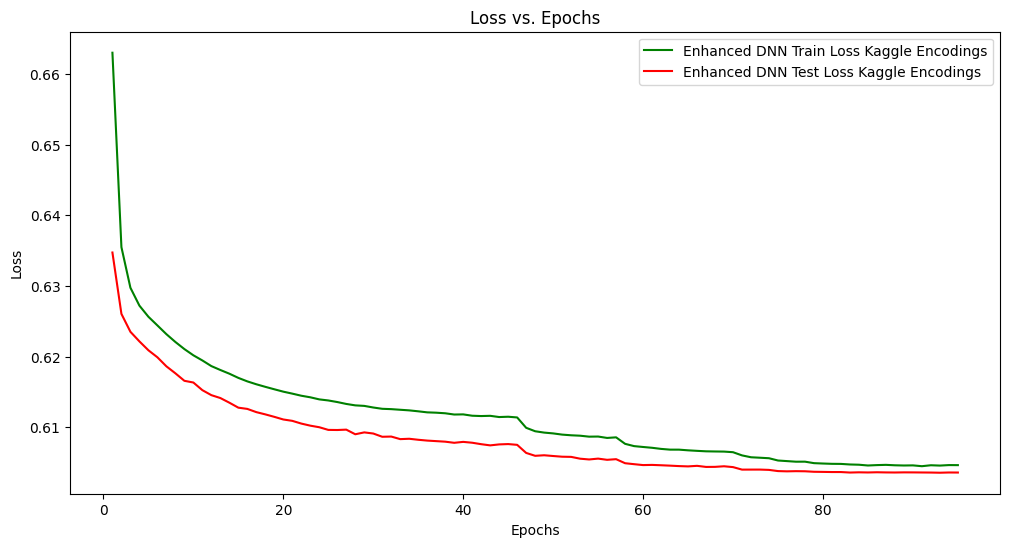

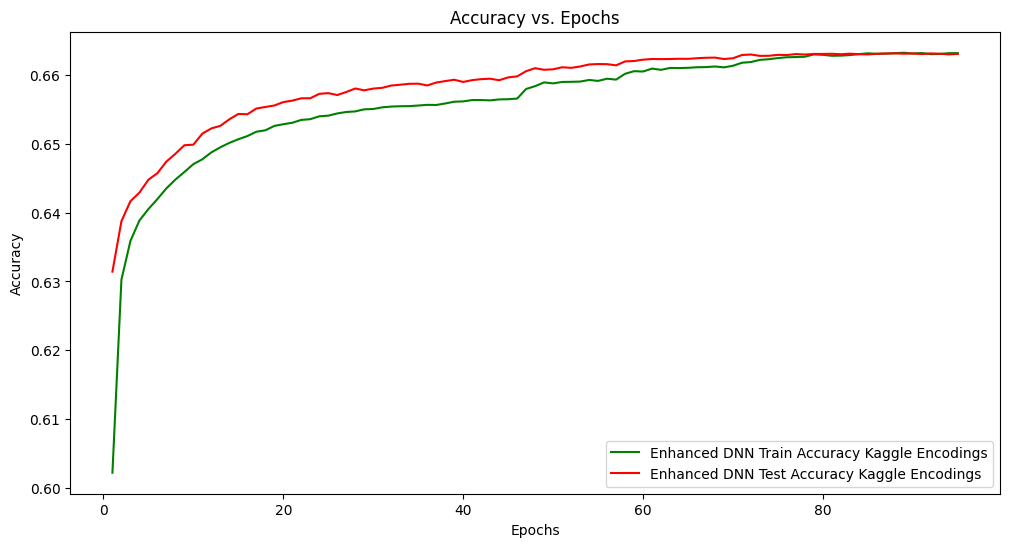

In [2]:
import matplotlib.pyplot as plt
import numpy as np


# Plotting function
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, len(train_loss_kagenc) + 1), train_loss_kagenc, label='Enhanced DNN Train Loss Kaggle Encodings', color='green')
plt.plot(np.arange(1, len(test_loss_kagenc) + 1), test_loss_kagenc, label='Enhanced DNN Test Loss Kaggle Encodings', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

# Plotting function for accuracy
plt.figure(figsize=(12, 6))
plt.plot(np.arange(1, len(train_accuracy_kagenc) + 1), train_accuracy_kagenc, label='Enhanced DNN Train Accuracy Kaggle Encodings', color='green')
plt.plot(np.arange(1, len(test_accuracy_kagenc) + 1), test_accuracy_kagenc, label='Enhanced DNN Test Accuracy Kaggle Encodings', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Epochs')
plt.legend()
plt.show()